# Выполнение задания по проверке ЦПТ.

In [1]:
#Импортируем все необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import matplotlib.mlab as mlab
%matplotlib inline

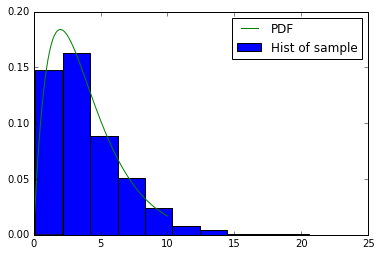

In [5]:
#Для выполнения задания выбрал распределение Хи-квадрат
#Построим распределение для k = 4
k = 4
rv = sts.chi2(k)
#Сгенерируем выборку из созданного распределения и построим гистограмму этой выборки
y = rv.rvs(1000)
plt.hist(y, normed = True, label="Hist of sample")
#Построим график теоретической плотности
x = np.linspace(0,10,1000)
pdf = rv.pdf(x)
plt.plot(x,pdf, label = "PDF")
plt.legend()

In [15]:
#напишем функцию, которая по введенным k(количество степеней свободы), n(размер выборки) и N(количество выборок)
#строит гистограмму и соответствующую кривую плотности распределения нормального распределения
def plot_chi_norm_pdf(k,n, N=1000):
    rv = sts.chi2(k)
    plt.subplots()
    means_x = []
    for i in range(N):
        t = rv.rvs(n)
        t_mean = t.mean()
        means_x.append(t_mean)
    print("Measured mean is:", np.mean(means_x))
    print("Measured std is:", np.std(means_x))
    #построим гистограмму
    plt.hist(means_x,normed=True)
    plt.title("Histogram ($\chi^2_k$), n = %s"%n)
    #построим график плотности нормального распределения
    #по ЦПТ теоретическое МО = k, а дисперсия = 2k (где k - количество степеней свободы)
    sigma = np.sqrt(2*k/n)  #n - количество элементов в выборке
    r_norm = sts.norm(k, sigma)
    x = np.linspace(k-n,k+n, N)
    norm_pdf = r_norm.pdf(x)
    plt.plot(x, norm_pdf, label = "PDF")
    plt.legend()

Measured mean is: 3.94232552338
Measured std is: 1.26411345436


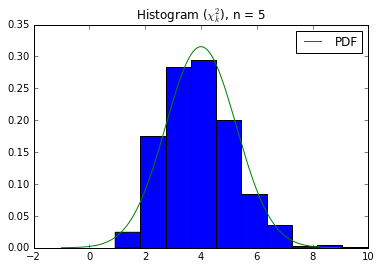

In [17]:
#Для выборки размера 5
plot_chi_norm_pdf(4,5)

Measured mean is: 3.95167092886
Measured std is: 0.912707405069


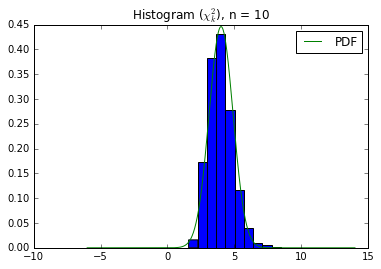

In [20]:
#Для выборки размера 10
plot_chi_norm_pdf(4,10)

Measured mean is: 4.02144181887
Measured std is: 0.404876602664


(0, 8)

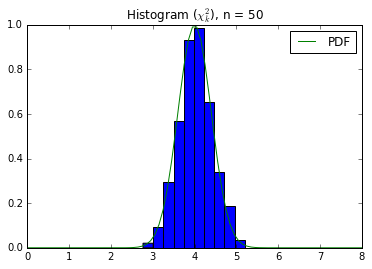

In [28]:
#Для выборки размера 50
plot_chi_norm_pdf(4,50)
plt.xlim(0,8)

Можно заметить, что с увеличением размера выборки (n) точность аппроксимации распределения выборочных средних нормальным с ростом n возрастает, что видно на графиках. C Увеличением n также уменьшается разброс (дисперсия). 